# 20 Sklearn Features You Didn't Know About | P(Guarantee) = 0.75
## 1. EllipticalEnvelope, 3. ExtraTrees, 7. Perceptron, 11. IsolationForest, 13. RobustScaler
![](images/unsplash.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://unsplash.com/@alevisionco?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText'>alevision.co</a>
        on 
        <a href='https://unsplash.com/s/photos/secret?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText'>Unsplash</a>
    </strong>
</figcaption>

### Setup

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

rcParams["figure.figsize"] = [12, 9]
rcParams["figure.autolayout"] = True
rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15
rcParams["legend.fontsize"] = "small"

warnings.filterwarnings("ignore")

np.random.seed(1121218)

### Introduction

### 1. [covariance.EllipticEnvelope](https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html#sklearn.covariance.EllipticEnvelope)

It is common for distributions to have outliers. There are many algorithms that deal with outliers and `EllipticalEnvelope` is an example that is directly built-in to Sklearn. The advantage of this algorithm is that it performs exceptionally well at detecting outliers in normally distributed (Gaussian) features:

In [18]:
import numpy as np
from sklearn.covariance import EllipticEnvelope

# Create a sample normal distribution
X = np.random.normal(loc=5, scale=2, size=50).reshape(-1, 1)

# Fit the estimator
ee = EllipticEnvelope(random_state=0)
_ = ee.fit(X)

# Test
test = np.array([6, 8, 20, 4, 5, 6, 10, 13]).reshape(-1, 1)

# predict returns 1 for an inlier and -1 for an outlier
ee.predict(test)

array([ 1,  1, -1,  1,  1,  1, -1, -1])

To test the estimator, we are creating a normal distribution with a mean of 5 and a standard deviation of 2. After it is trained, we pass some random numbers to its `predict` method. The method returns -1 for outliers in the `test` - 20, 10, 13.

### 2. feature_selection.RFECV

Feature selection is an invaluable skill in machine learning. Selecting the features that help with predictions the most is a must step to combat overfitting and reduce model complexity. There are various techniques for feature selection that work based on the properties of each feature or the relationships between them. However, there is a more robust algorithm offered by Sklearn - Recursive Feature Elimination (RFE). It automatically finds the most important features by using cross-validation and discards the rest.

An advantage of this estimator is that it is a wrapper - it can be used around any Sklearn algorithm that returns feature importance or coefficient scores. Here is an example on a synthetic dataset:

In [25]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge

# Build a synthetic dataset
X, y = make_regression(n_samples=10000, n_features=15, n_informative=10)

# Init/fit the selector
rfecv = RFECV(estimator=Ridge(), cv=5)
_ = rfecv.fit(X, y)
# Transform the feature array
rfecv.transform(X).shape

(10000, 10)

The fake dataset has 15 features, 10 of which are informative, the rest are redundant. We are fitting 5-fold RFECV with `Ridge` regression as an estimator. After training, you can use the `transform` method to discard the redundant features. Calling `.shape` shows us that the estimator managed to drop all 5 unnecessary features.

I have wrote an [entire article](https://towardsdatascience.com/powerful-feature-selection-with-recursive-feature-elimination-rfe-of-sklearn-23efb2cdb54e?source=your_stories_page-------------------------------------) on this algorithm that covers the nitty-gritty details of how it works with a real-world dataset.

### 3. ensemble.ExtraTrees

Random Forests is one of the most powerful algorithms in classic machine learning. It uses multiple decision trees and reduces overfitting by averaging the prediction scores. Each tree is trained on a random subset of the samples and during the construction of each tree, random subset of features are chosen to generate the node splits. By using these two sources of randomness, RF tries to decrease variance because its main disadvantage is that it tends to overfit.  

Regardless, in RF, the risk of overfitting is still high. Therefore, Sklearn offers a drop-in alternative to RF called ExtraTrees (both classifier and regressor). The word 'extra' does not mean more trees but more randomness. The algorithm uses another type of trees that closely resemble decision trees. The only difference is that instead of calculating the split thresholds while building each tree, these thresholds are drawn randomly for each feature and the best of these thresholds is chosen as a splitting rule. This allows to reduce the variance a bit at the cost of slight increase in bias:

In [23]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

X, y = make_regression(n_samples=10000, n_features=20)

# Decision trees
clf = DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.6376080094392635

In [21]:
# Random Forest
clf = RandomForestRegressor(
    n_estimators=10, max_depth=None, min_samples_split=2, random_state=0
)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.8446103607404536

In [22]:
# ExtraTrees
clf = ExtraTreesRegressor(
    n_estimators=10, max_depth=None, min_samples_split=2, random_state=0
)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.8737373931608834

Read more about Extremely Randomized Trees from the official [user guide](https://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees).

### 4. impute.IterativeImputer and KNNImputer

If you are looking for a more robust and more advanced imputation techniques than `SimpleImputer`, Sklearn got you covered once again. The `impute` subpackage includes two model-based imputation algorithms - `KNNImputer` and `IterativeImputer`.

As the name suggests, `KNNImputer` uses k-Nearest-Neighbors algorithm to find the best replacement for missing values:

In [27]:
from sklearn.impute import KNNImputer

# Code takes from Sklearn user guide
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]

imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

A more robust algorithm is `IterativeImputer`. It finds missing values by modeling each feature with missing values as a function of others. This process is done in a step-by-step round-robin fashion. At each step, a single feature with missing values is chosen as target (`y`) and the rest are chosen as feature array (`X`). Then, a regressor is used to predict the missing values in `y` and this process is continued for each feature until `max_iter`  times (a parameter of IterativeImputer).

As a result, multiple predictions are generated for a single missing value. This has the benefit of treating each missing value as a random variable and associate the inherent uncertainty that come with them:

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imp_mean = IterativeImputer(estimator=BayesianRidge())
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]

imp_mean.transform(X)

array([[ 6.95847623,  2.        ,  3.        ],
       [ 4.        ,  2.6000004 ,  6.        ],
       [10.        ,  4.99999933,  9.        ]])

> BayesianRidge is found to perform better with IterativeImputer.

You can learn more about these two imputation techniques in my [separate article](https://towardsdatascience.com/going-beyond-the-simpleimputer-for-missing-data-imputation-dd8ba168d505).

### 5. linear_model.HuberRegressor

The presence of outliers can heavily screw-up the predictions of any model. Many outlier detection algorithms discard outliers and mark them as missing. While this helps the learning function of the models, it completely removes the effect the outliers have on the distribution.

An alternative algorithm that is robust to outliers is `HuberRegressor`. Instead of completely removing them, it gives outliers less weight during the fit time. It has `epsilon` hyperparameter that controls the number of samples that should be classified as outliers. The smaller the parameter, the more it is robust to outliers. Its API is the same as any other linear regressors. Below, you can see [its comparison](https://scikit-learn.org/stable/auto_examples/linear_model/plot_huber_vs_ridge.html#sphx-glr-auto-examples-linear-model-plot-huber-vs-ridge-py) with Bayesian Ridge regressor on a dataset heavy outliers:
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_huber_vs_ridge_001.png)
<figcaption style="text-align: center;">
    <strong>
        Image by Sklearn
    </strong>
</figcaption>

You can learn more about the algorithm from the [user guide](https://scikit-learn.org/stable/modules/linear_model.html#huber-regression).

### 6. tree.plot_tree

Sklearn allows you to plot the structure of a single decision tree using the `plot_tree` function. This feature may be especially useful for beginners who just started learning about tree-based and ensemble models:

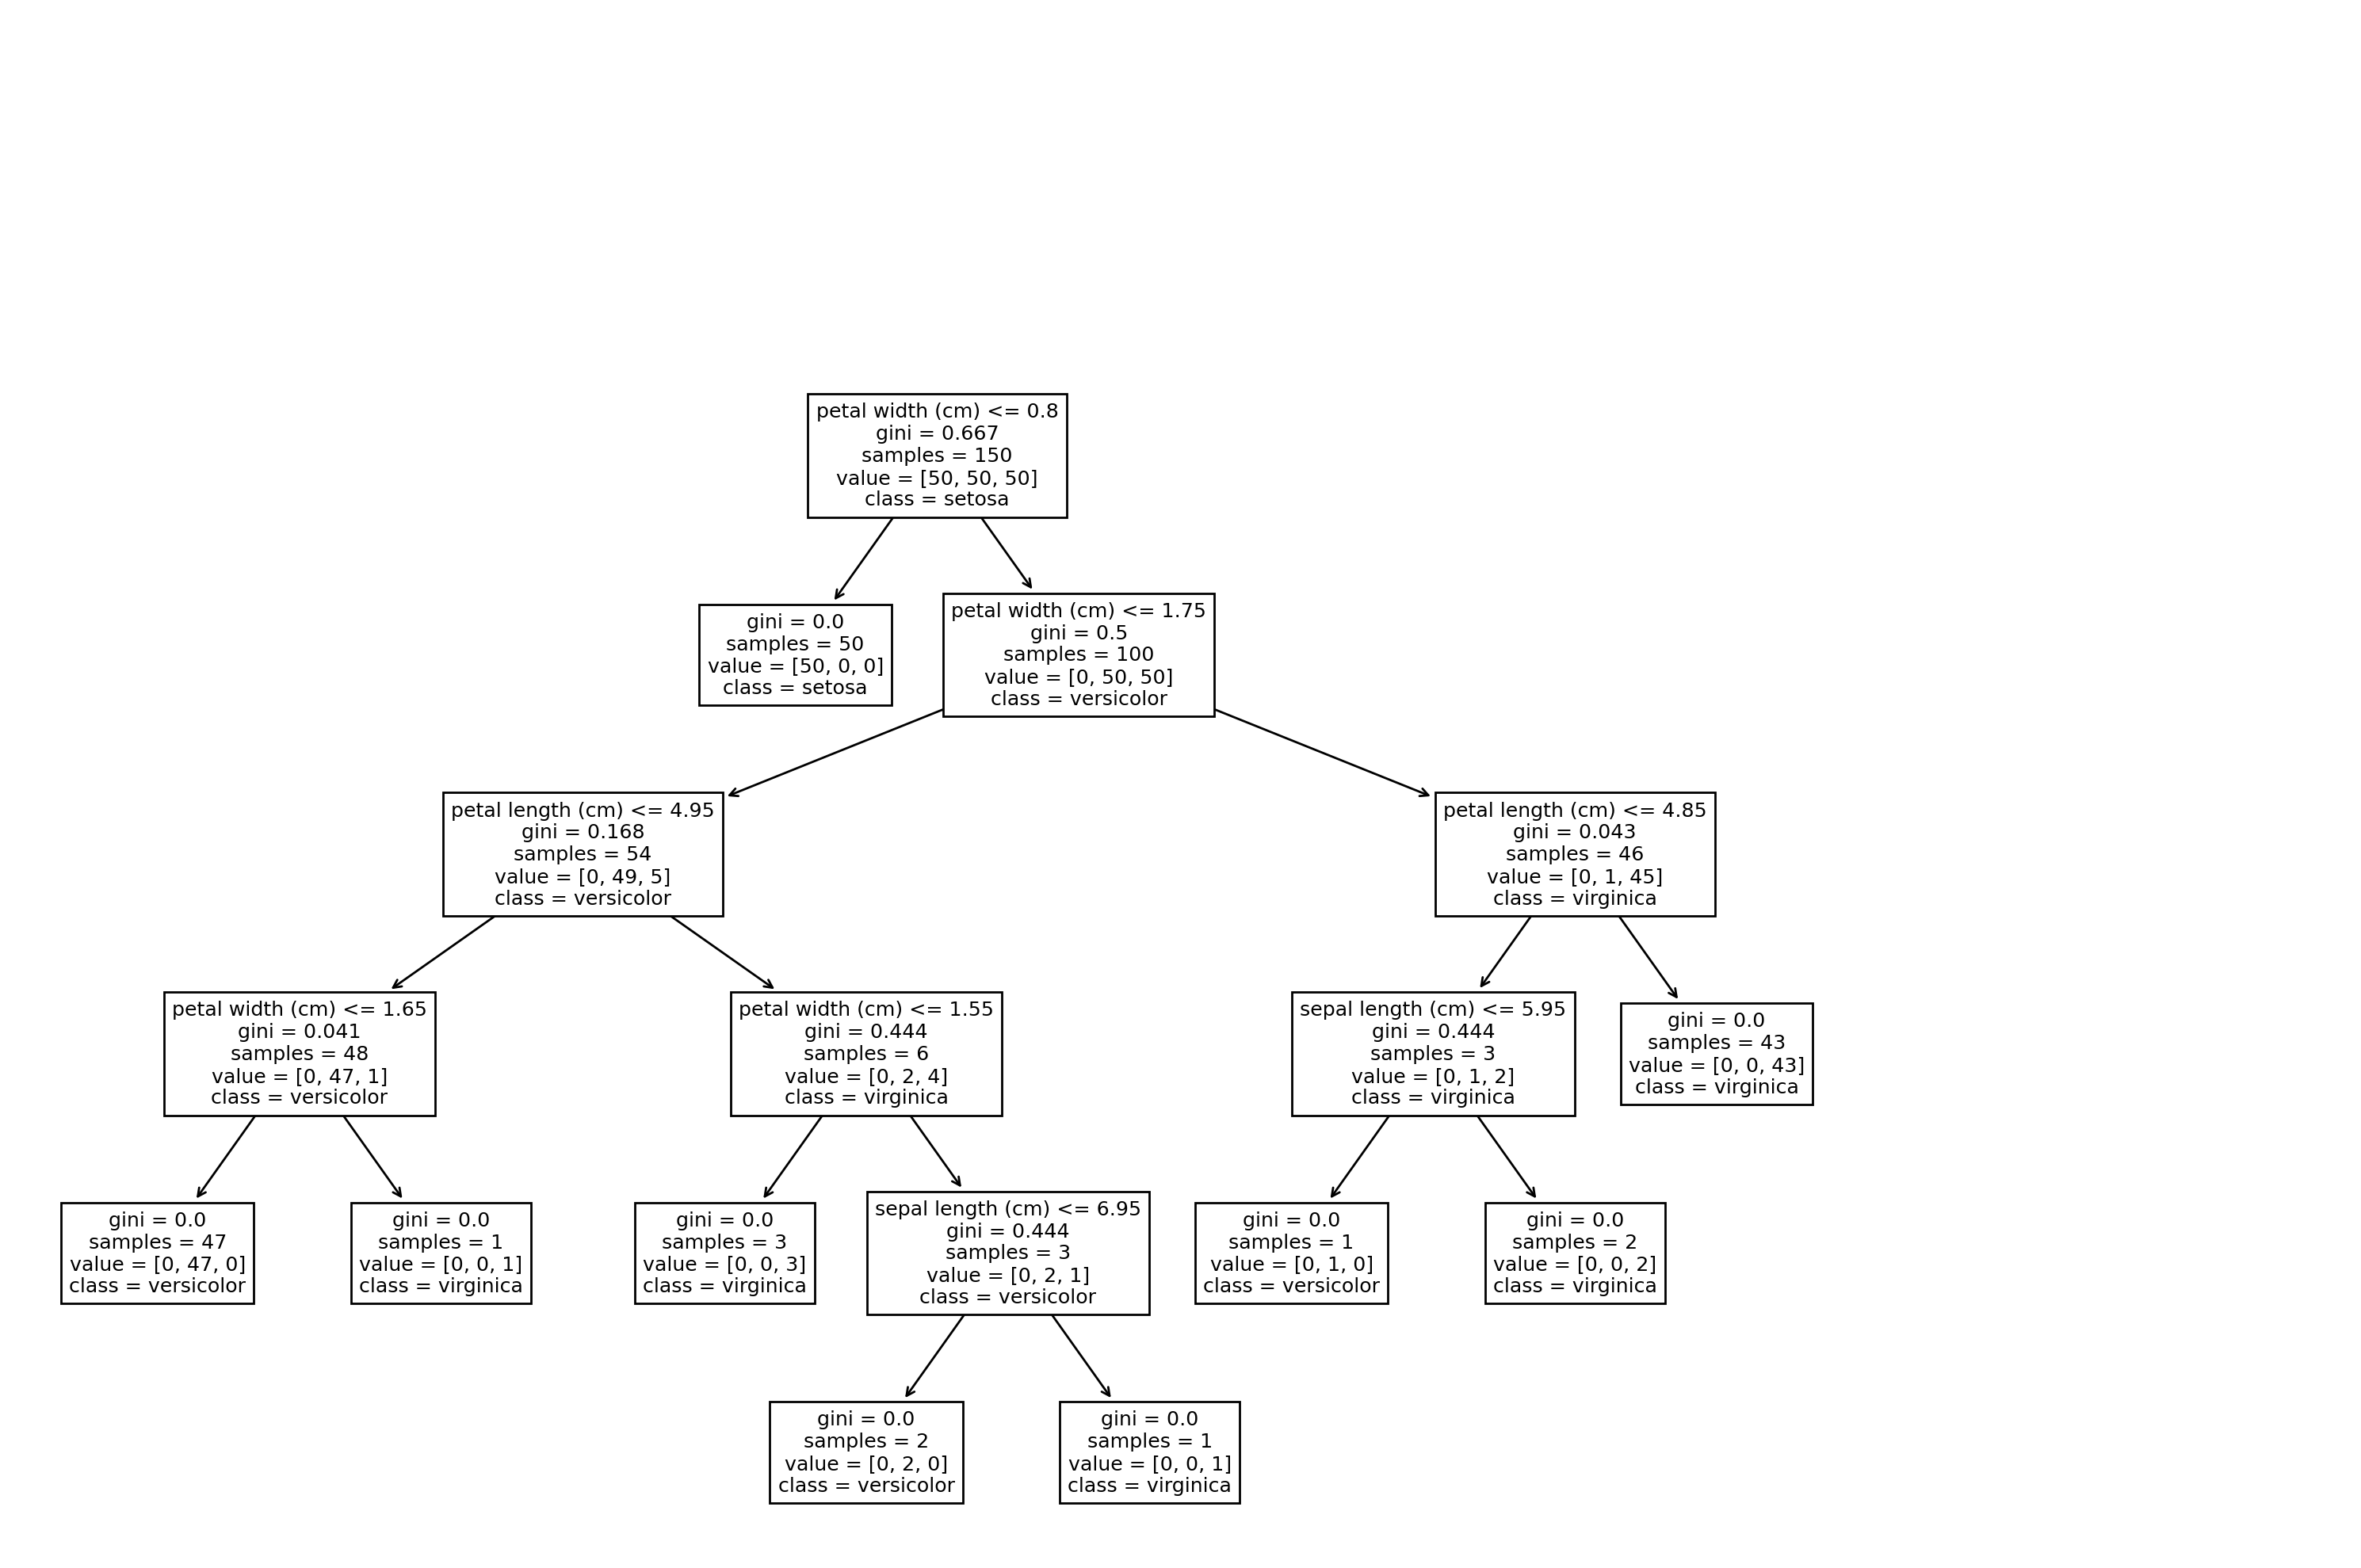

In [39]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

plt.figure(figsize=(15, 10), dpi=200)
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names);

There are other methods of plotting the trees such as in Graphviz format. Learn about them from the [user guide](https://scikit-learn.org/stable/modules/tree.html#decision-trees).

### 7. linear_model.Perceptron

The coolest name in this list goes to the #7 - Perceptron. Even though it has a fancy name, it is a simple linear binary classifier. The defining feature of the algorithm is that it is suitable for large scale learning and by default:

1. It does not require a learning rate.
2. Does not implement regularization.
3. It updates its model only on mistakes. 

It is equivalent to SGDClassifier with `loss='perceptron', eta0=1, learning_rate="constant", penalty=None` but slightly faster:

In [45]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron

# Create a large dataset
X, y = make_classification(n_samples=100000, n_features=20, n_classes=2)

# Init/Fit/Score
clf = Perceptron()
_ = clf.fit(X, y)

clf.score(X, y)

0.91928

### 8. feature_selection.SelectFromModel

Another model-based feature selection estimator in Sklearn is `SelectFromModel`. It is not as robust as RFECV but can be a good option for massive datasets since it has lower computation cost. It is also a wrapper estimator and works with any model that has either `.feature_importances_` or `.coef_` attributes:

In [48]:
from sklearn.feature_selection import SelectFromModel

# Make a dataset with 40 uninformative features
X, y = make_regression(n_samples=int(1e4), n_features=50, n_informative=10)

# Init the selector and transform feature array
selector = SelectFromModel(estimator=ExtraTreesRegressor()).fit(X, y)
selector.transform(X).shape

(10000, 8)

As you can see, the algorithm managed to drop all 40 redundant features.

### 9. metrics.ConfusionMatrixDisplay

Confusion matrices are the holy grail of classification problems. Majority of metrics are derived from it, such as precision, recall, F1, ROC AUC, etc. Sklearn allows you to compute and plot a default confusion matrix:

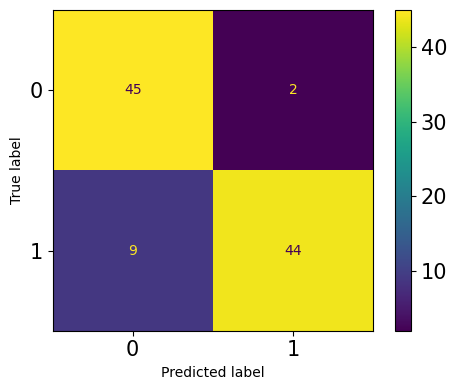

In [60]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

# Make a binary classification problem
X, y = make_classification(n_samples=200, n_features=5, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=1121218
)

clf = ExtraTreeClassifier().fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
plot_confusion_matrix(clf, X_test, y_test, ax=ax);

Honestly, I don't like the default confusion matrix. Its format is fixed - the rows are true labels and columns are predictions. Also, the first row and column are the negative class and the second row and column is positive. Some people might prefer a matrix that is in a different format, maybe transposed or flipped. 

For example, I like to make the positive class as the first row and the second column to make it align with the format that is given in Wikipedia. This helps me to better isolate the 4 matrix terms - TP, FP, TN, FN. Luckily, you can plot custom matrix with another function - `ConfusionMatrixDisplay`:

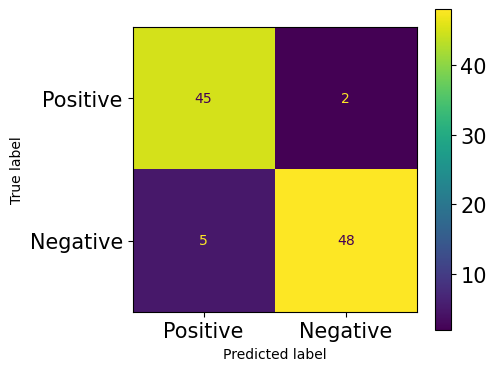

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

clf = ExtraTreeClassifier().fit(X_train, y_train)
y_preds = clf.predict(X_test)

fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cm = confusion_matrix(y_test, y_preds)
cmp = ConfusionMatrixDisplay(cm, display_labels=["Positive", "Negative"])
cmp.plot(ax=ax);

You can put the confusion matrix `cm` in any format you want before passing it to `ConfusionMatrixDisplay`.

### 10. Generalized Linear Models

Almost all Sklearn models have normality assumptions. This means that an algorithm expects the response variable (`y`) to be as close as possible to a normal distribution. 

However, it is not always the case that real-world data comes in this shape. Besides, there is no point in transforming the target to make it normally distributed if there are alternatives that can work on other types of distributions. 

For example, Sklearn offers 3 generalized linear models for target variables that are Poisson, Tweedie or Gamma distributed. Rather than expecting a normal distribution, `PoissonRegressor`, `TweedieRegressor` and `GammaRegressor` can generate robust results for targets with respective distributions. 

Apart from that, their APIs are the same as any other Sklearn model. To find out if the distribution of the target matches the above three, you can plot their PDF (Probability Density Function)s on the same axes with the perfect distribution. For example, to see if the target follows poission distribution, plot its PDF using Seaborn's `kdeplot` and plot the perfect poisson distribution by sampling it from Numpy using `np.random.poisson` on the same axes. 

### 11. ensemble.IsolationForest

As tree-based and ensemble models generally produce more robust results, they have been proven effective in outlier detection as well. `IsolationForest` in Sklearn uses a forest of extremely random trees (`tree.ExtraTreeRegressor`) to detect outliers. Each tree tries to isolate each sample by selecting a single feature and randomly choosing a split value between the maximum and minimum values of the selected feature.

This type of random partitioning produces noticeably shorter paths between the root node and the terminating node of each tree. 

> Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies - Sklearn user guide.

In [12]:
from sklearn.ensemble import IsolationForest

X = np.array([-1.1, 0.3, 0.5, 100]).reshape(-1, 1)

clf = IsolationForest(random_state=0).fit(X)
clf.predict([[0.1], [0], [90]])

array([ 1,  1, -1])

Read more about the algorithm in the [user guide](https://scikit-learn.org/stable/modules/outlier_detection.html#isolation-forest).

### 12. preprocessing.PowerTransformer

Many linear models require some type of transformation on numeric features to make them normally distributed. `StandardScaler` and `MinMaxScaler` work pretty well for most distributions. However, when there is high skewness in the data, the core metrics of the distribution such as mean, median, min and maximum values get skewed as well. So, simple normalization and standardization does not work on skewed distributions. 

Instead, Sklearn implements `PowerTransformer` that uses logarithmic transform to turn any skewed feature into a normal distribution as close as possible. Consider these two features in the Diamonds dataset:

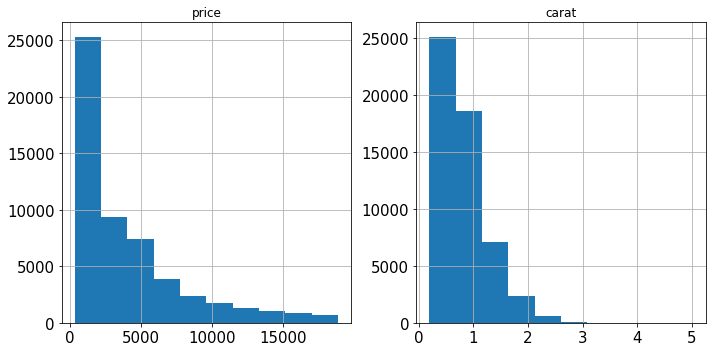

In [34]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")
diamonds[["price", "carat"]].hist(figsize=(10, 5));

Both are heavily skewed. Let's fix that using a logarithmic transform:

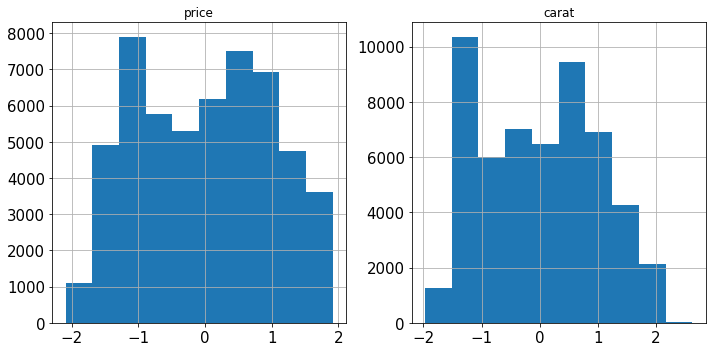

In [38]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
diamonds.loc[:, ["price", "carat"]] = pt.fit_transform(diamonds[["price", "carat"]])

diamonds[["price", "carat"]].hist(figsize=(10, 5));

The skewness is gone! You can read more about different types of feature transformations [here](https://towardsdatascience.com/how-to-differentiate-between-scaling-normalization-and-log-transformations-69873d365a94?source=your_stories_page-------------------------------------).

### 13. preprocessing.RobustScaler

Another numeric transformer in Sklearn is `RobustScaler`. You can probably guess what it does from its name - it can transform features in a way that is robust to outliers. If outliers are present in a feature, it is hard to make them normally distributed because they can heavily skew the mean and the standard deviation.

Instead of using mean/std, `RobustScaler` scales the data using median and IQR (interquartile range) since both metrics are not biased because of outliers. You can also read about it on the [user guide](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).

### 14. compose.make_column_transformer

In Sklearn, there is a shorthand for creating Pipeline instances with `make_pipeline` function. Instead of naming each step and making your code unnecessarily long, the function just accepts the transformers and estimators and does its job:

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(SimpleImputer(), StandardScaler(), ExtraTreesRegressor())
pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('extratreesregressor', ExtraTreesRegressor())])

For more complex scenarios, `ColumnTransformer` is used which has the same problem - each preprocessing step should be named making your code long and unreadable. Thankfully, Sklearn offers a similar function to `make_pipeline`:

In [26]:
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# Load diamonds dataset
diamonds = sns.load_dataset("diamonds")
X, y = diamonds.drop("price", axis=1), diamonds.price.values.reshape(-1, 1)

# Isolate numeric and categorical cols
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns

make_column_transformer((StandardScaler(), num_cols), (OneHotEncoder(), cat_cols))

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')),
                                ('onehotencoder', OneHotEncoder(),
                                 Index(['cut', 'color', 'clarity'], dtype='object'))])

As you can see, using `make_column_transformer` is much shorter and it takes care of name each transformer step by itself.

### 15. compose.make_column_selector

If you paid attention, we used `select_dtypes` function along with the `columns` attribute of pandas DataFrames to isolate numeric and categorical columns. While this certainly works, there is a much more flexible and elegant solution to this using Sklearn.

`make_column_selector` function creates a column selector that can be passed directly into `ColumnTransformer` instances. It works just like `select_dtypes` and better. It has `dtype_include` and `dtype_exclude` parameters to select columns based on data type. If you need custom column filter, you can pass a regular expression to `pattern` while setting other parameters to `None`. Here is how it works:

```python
from sklearn.compose import make_column_selector

make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(), make_column_selector(dtype_exclude=np.number)),
)
```

Instead of passing a column name, just pass an instance of `make_column_selector` with relevant parameters and you are set!

### 16. preprocessing.OrdinalEncoder

A common mistake among beginners is to use `LabelEncoder` to encode ordinal categorical features. If you have noticed, `LabelEncoder` allows transforming columns only one at a time rather than simultaneously like `OneHotEncoder`. You might think that Sklearn made a mistake!

Actually, `LabelEncoder` should only be used to encode the response variable (`y`) as specified in its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). To encode the features array (`X`), you should use `OrdinalEncoder` which works as expected. It converts ordinal categorical columns to a feature with (0, n_categories - 1) classes. And it does this across all specified columns in a single line of code making it possible to include it in pipelines.

In [42]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
X = [
    ["class_1", "rank_1"],
    ["class_1", "rank_3"],
    ["class_3", "rank_3"],
    ["class_2", "rank_2"],
]

oe.fit_transform(X)

array([[0., 0.],
       [0., 2.],
       [2., 2.],
       [1., 1.]])

### 17. metrics.get_scorer

There are more than 50 metrics built-in to Sklearn and their textual names can be seen in `sklearn.metrics.SCORERS.keys`. In a single project, you might have to use several metrics and import them if you are using them separately. Importing a lot of metrics from `sklearn.metrics` directly might pollute your namespace and become unnecessarily long. As a solution, you can use `metrics.get_scorer` function to access any metric with its text name without ever importing it:

In [48]:
from sklearn.metrics import get_scorer

get_scorer("neg_mean_squared_error")

make_scorer(mean_squared_error, greater_is_better=False)

In [49]:
get_scorer("recall_macro")

make_scorer(recall_score, pos_label=None, average=macro)

In [50]:
get_scorer("neg_log_loss")

make_scorer(log_loss, greater_is_better=False, needs_proba=True)

###  18. model_selection.HalvingGrid and HalvingRandomizedSearchCV

In version 0.24 of Sklearn, we got introduced to two experimental hyperparameter optimizers: `HalvingGridSearchCV` and `HalvingRandomSearchCV` classes. 

Unlike their exhaustive cousins GridSearch and RandomizedSearch, the new classes use a technique called Successive Halving. Instead of training all candidate sets on all of the data, only a subset of data is given to the parameters. The worst-performing candidates are filtered out by training them on a smaller subset of data. After each iteration, the training samples increases by some factor and the number of possible candidates decrease by as much leading to much faster evaluation time.

How much faster? Well, in the experiments I have conducted, HalvingGridSearch was 11 times faster than regular grid search and HalvingRandomSearch was even 10 times faster than HalvingGridSearch. You can read my detailed overview of Successive Halving and my experiments from here:

https://towardsdatascience.com/11-times-faster-hyperparameter-tuning-with-halvinggridsearch-232ed0160155

### 19. sklearn.utils